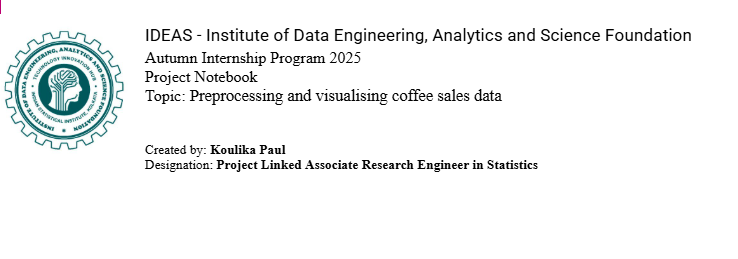

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
coffee_data=pd.read_csv("/content/drive/MyDrive/Coffe_sales.csv")
coffee_data

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


**Q1. Find the number of columns, duplicate columns, and missing values**

In [38]:
correct_path = "/content/drive/MyDrive/Coffe_sales.csv"
coffee_data = pd.read_csv(correct_path)

print("Number of columns:", coffee_data.shape[1])
print("Number of rows:", coffee_data.shape[0])
print("Number of duplicate columns:", coffee_data.columns.duplicated().sum())
print("\nMissing values in each column:")
print(coffee_data.isnull().sum())



Number of columns: 11
Number of rows: 3547
Number of duplicate columns: 0

Missing values in each column:
hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


***Basic statistics of the data***

In [31]:
coffee_data.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [32]:
coffee_data.dtypes

,0
hour_of_day,int64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,int64
Monthsort,int64
Date,object


In [33]:
coffee_data['Date']= pd.to_datetime(coffee_data['Date']) ## converting the object datatype to datetime
coffee_data['Month']=coffee_data['Date'].dt.month
coffee_data['Year']=(coffee_data['Date'].dt.year).astype('int')

***Average money for each year***

In [34]:
grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)
grouped_data

/tmp/ipython-input-3058338727.py:1: FutureWarning: The provided callable <function mean at 0x792d6cf889a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_data=coffee_data.groupby('Year')['money'].agg(np.mean)


,money
Year,
2024,31.737634
2025,31.390011


**Q2. Find the datatype of grouped_data**

In [37]:
num_columns = coffee_data.shape[1]
print("Number of columns:", num_columns)

print("\nDataset Info:")
print(coffee_data.info())


Number of columns: 11

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB
None


**Q3. Find the maximum money for each month**

In [39]:

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


monthly_max_df = coffee_data.groupby('Month_name')['money'].max().reset_index()
monthly_max_df['Month_name'] = pd.Categorical(monthly_max_df['Month_name'],
                                              categories=month_order,
                                              ordered=True)
monthly_max_df = monthly_max_df.sort_values('Month_name')

print("Maximum money for each month (in chronological order):")
print(monthly_max_df)

Maximum money for each month (in chronological order):
   Month_name  money
4         Jan  35.76
3         Feb  35.76
7         Mar  38.70
0         Apr  38.70
8         May  37.72
6         Jun  37.72
5         Jul  37.72
1         Aug  32.82
11        Sep  35.76
10        Oct  35.76
9         Nov  35.76
2         Dec  35.76


***Distribution of money over months***

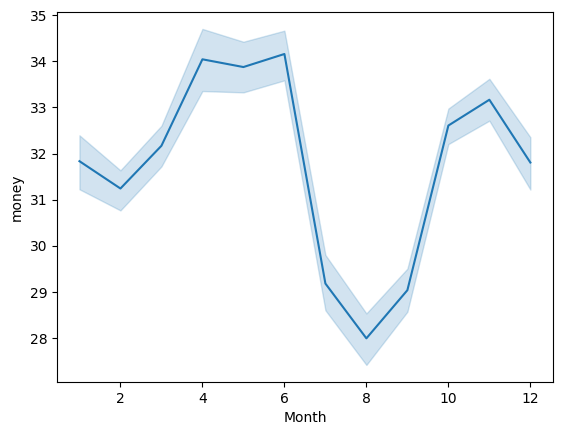

In [ ]:
sns.lineplot(x=coffee_data['Month'],y='money',data=coffee_data)
plt.show()

***The density of money over years***

<Axes: xlabel='Year', ylabel='money'>

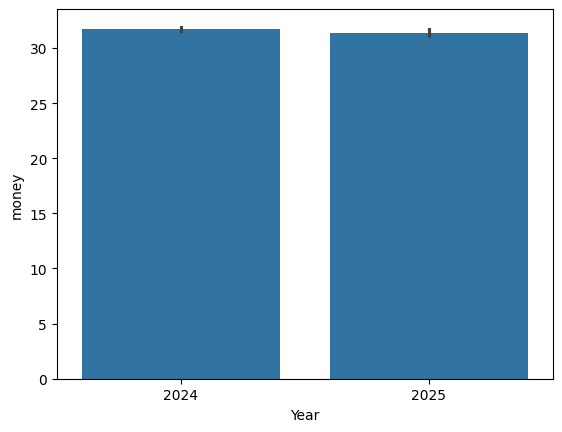

In [ ]:
sns.barplot(data= coffee_data,x='Year',y= coffee_data['money'])


**Q4. Find the distribution of money over coffee names**


Distribution of money over coffee names:
                     count       mean       std    min    25%    50%    75%  \
coffee_name                                                                   
Americano            564.0  25.975638  1.676099  23.02  25.96  25.96  25.96   
Americano with Milk  809.0  30.594710  1.883843  27.92  27.92  30.86  30.86   
Cappuccino           486.0  35.883004  1.819232  32.82  35.76  35.76  37.72   
Cocoa                239.0  35.653389  1.233693  32.82  35.76  35.76  35.76   
Cortado              287.0  25.731220  2.093669  23.02  23.02  25.96  27.92   
Espresso             129.0  20.854884  1.974016  18.12  18.12  21.06  23.02   
Hot Chocolate        276.0  35.990797  1.437499  32.82  35.76  35.76  35.76   
Latte                757.0  35.502378  1.821834  32.82  32.82  35.76  35.76   

                      max  
coffee_name                
Americano            28.9  
Americano with Milk  33.8  
Cappuccino           38.7  
Cocoa                38.7  


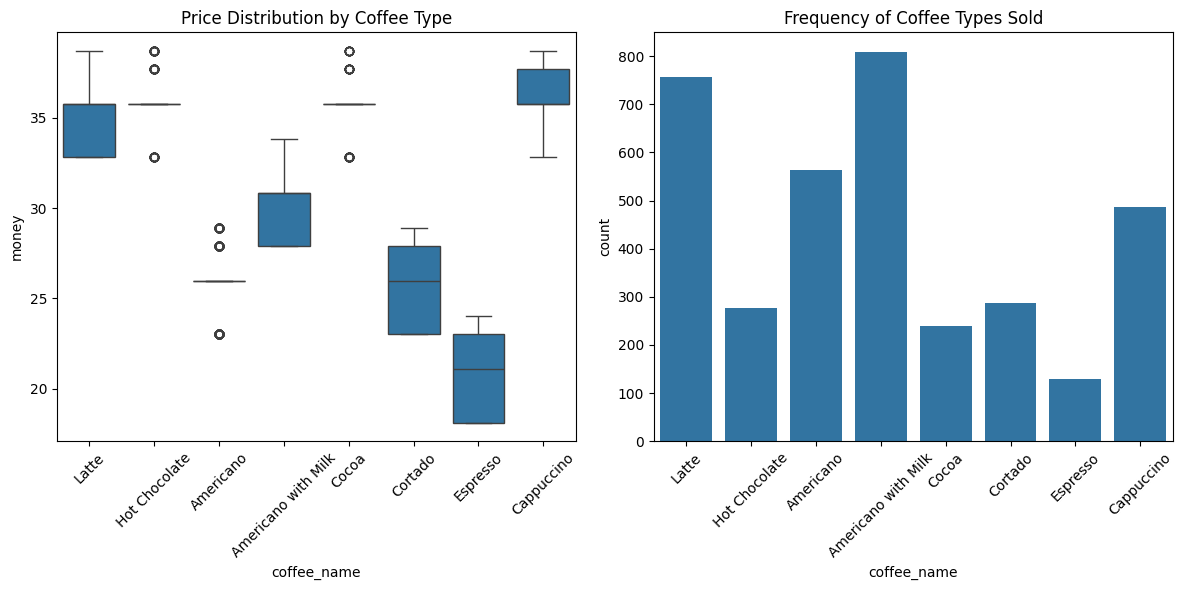


Total revenue by coffee type:
coffee_name
Latte                  26875.30
Americano with Milk    24751.12
Cappuccino             17439.14
Americano              14650.26
Hot Chocolate           9933.46
Cocoa                   8521.16
Cortado                 7384.86
Espresso                2690.28
Name: money, dtype: float64

Average price by coffee type:
coffee_name
Hot Chocolate          35.990797
Cappuccino             35.883004
Cocoa                  35.653389
Latte                  35.502378
Americano with Milk    30.594710
Americano              25.975638
Cortado                25.731220
Espresso               20.854884
Name: money, dtype: float64


In [40]:

coffee_money_distribution = coffee_data.groupby('coffee_name')['money'].describe()

print("Distribution of money over coffee names:")
print(coffee_money_distribution)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.boxplot(x='coffee_name', y='money', data=coffee_data)
plt.title('Price Distribution by Coffee Type')
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
sns.countplot(x='coffee_name', data=coffee_data)
plt.title('Frequency of Coffee Types Sold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


revenue_by_coffee = coffee_data.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
print("\nTotal revenue by coffee type:")
print(revenue_by_coffee)

avg_price_by_coffee = coffee_data.groupby('coffee_name')['money'].mean().sort_values(ascending=False)
print("\nAverage price by coffee type:")
print(avg_price_by_coffee)

***Times of the Day the dataset holds***

In [41]:
coffee_data['Time_of_Day'].value_counts()

,count
Time_of_Day,
Afternoon,1205
Morning,1181
Night,1161


**Q5. How many types of coffees are present in the dataset?**

In [43]:
num_coffee_types = coffee_data['coffee_name'].nunique()

print(f"Number of unique coffee types in the dataset: {num_coffee_types}")

unique_coffee_types = coffee_data['coffee_name'].unique()
print("\nUnique coffee types:")
for coffee in unique_coffee_types:
    print(f"- {coffee}")



Number of unique coffee types in the dataset: 8

Unique coffee types:
- Latte
- Hot Chocolate
- Americano
- Americano with Milk
- Cocoa
- Cortado
- Espresso
- Cappuccino


***Max money from coffee_name***

In [44]:
coffee_data.groupby('coffee_name')['money'].max()

,money
coffee_name,
Americano,28.9
Americano with Milk,33.8
Cappuccino,38.7
Cocoa,38.7
Cortado,28.9
Espresso,24.0
Hot Chocolate,38.7
Latte,38.7


**Q6. Find the average money made at what time of the day.**

Average money made at different times of the day:
Time_of_Day
Afternoon    31.643187
Morning      30.422693
Night        32.890904
Name: money, dtype: float64


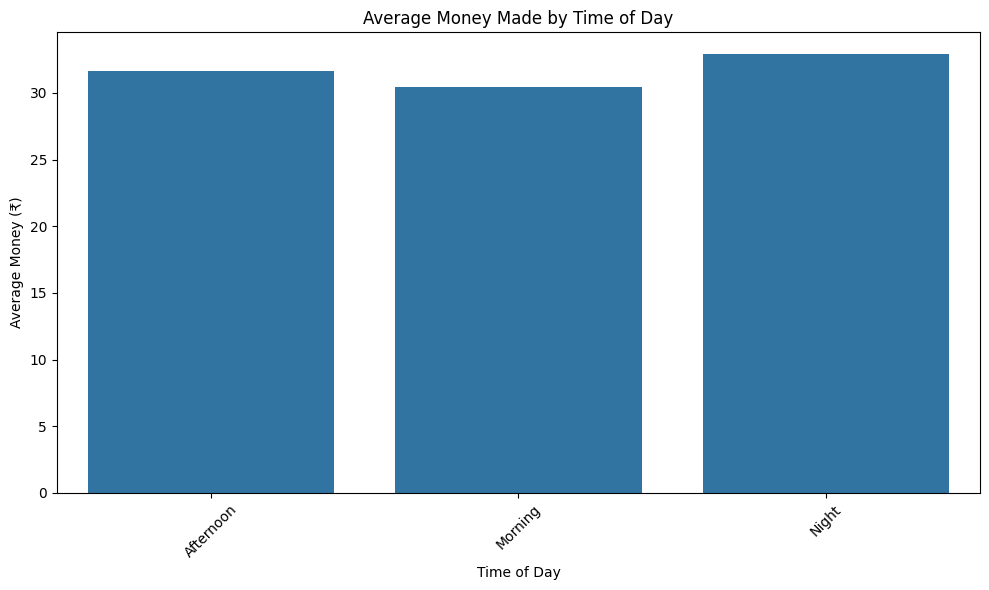

In [46]:
average_money_by_time = coffee_data.groupby('Time_of_Day')['money'].mean()

print("Average money made at different times of the day:")
print(average_money_by_time)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=average_money_by_time.index, y=average_money_by_time.values)
plt.title('Average Money Made by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Money (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



***Generate 100 synthetic data rows***

In [47]:

date_range= date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")
values = np.cumsum(np.random.randn(100))
df = pd.DataFrame({"date": date_range, "value": values})
df

,date,value
0,2023-01-01,-0.104200
1,2023-01-02,0.534419
2,2023-01-03,1.662067
3,2023-01-04,2.359199
4,2023-01-05,1.188099
...,...,...
95,2023-04-06,18.249423
96,2023-04-07,17.944933
97,2023-04-08,16.808789
98,2023-04-09,14.848901


**Q7. Insert synthetic data into the given data set and analyse as above.**

Original data shape: (3547, 11)
Synthetic data shape: (500, 11)
Combined data shape: (4047, 11)

Number of unique coffee types in combined dataset: 12
Unique coffee types:
['Latte' 'Hot Chocolate' 'Americano' 'Americano with Milk' 'Cocoa'
 'Cortado' 'Espresso' 'Cappuccino' np.str_('Macchiato')
 np.str_('Cold Brew') np.str_('Mocha') np.str_('Flat White')]

Distribution of money over coffee names (combined data):
                     count       mean       std    min      25%     50%  \
coffee_name                                                               
Americano            624.0  26.226651  2.035105  21.88  25.9600  25.960   
Americano with Milk  809.0  30.594710  1.883843  27.92  27.9200  30.860   
Cappuccino           542.0  35.870609  2.029696  29.58  35.7600  35.760   
Cocoa                239.0  35.653389  1.233693  32.82  35.7600  35.760   
Cold Brew             68.0  31.567206  2.782129  25.12  29.6175  31.705   
Cortado              287.0  25.731220  2.093669  23.02  23.0

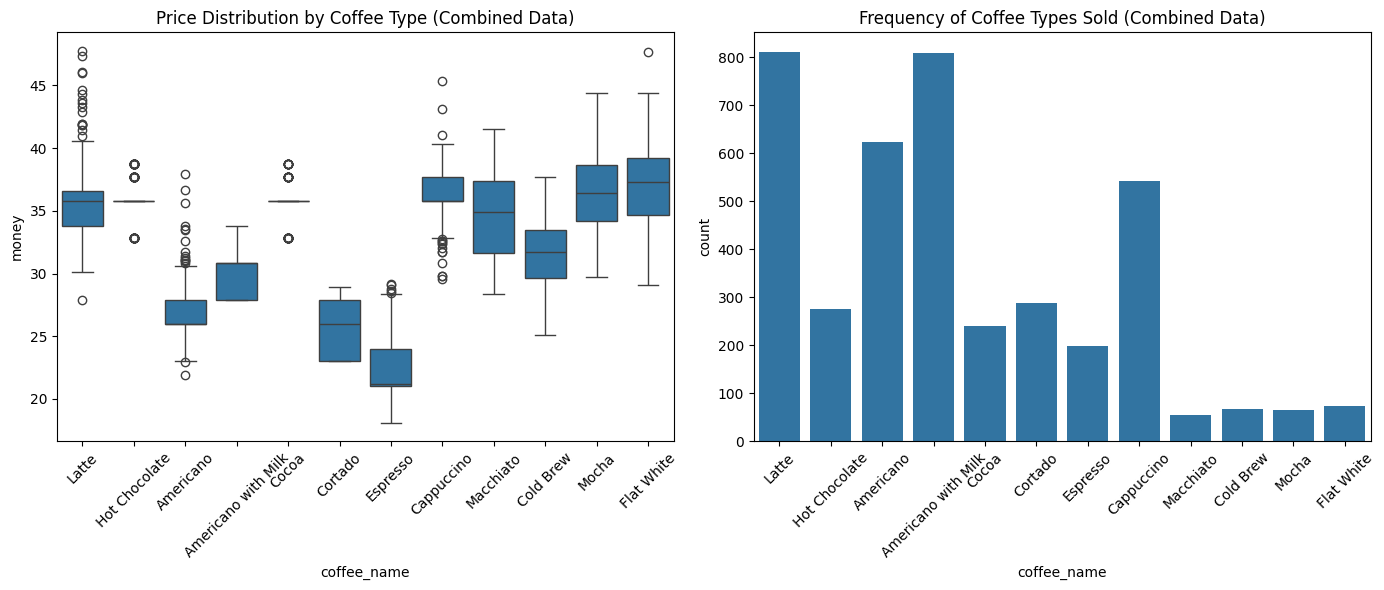


Average money made at different times of the day (combined data):
Time_of_Day
Afternoon    31.843098
Morning      30.819283
Night        32.962282
Name: money, dtype: float64


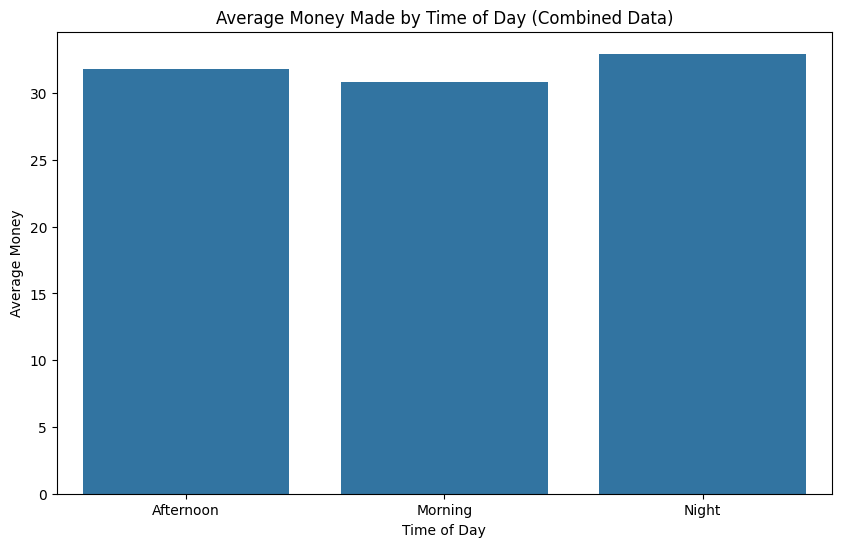

Maximum money for each month (combined data):
   Month_name  money
4         Jan  41.88
3         Feb  46.08
7         Mar  47.74
0         Apr  42.87
8         May  47.36
6         Jun  44.39
5         Jul  43.10
1         Aug  46.01
11        Sep  43.85
10        Oct  41.52
9         Nov  43.57
2         Dec  47.62

 COMPARISON
Coffee types in original data: 8
Coffee types in combined data: 12

Average money by time of day - Original:
Time_of_Day
Afternoon    31.643187
Morning      30.422693
Night        32.890904
Name: money, dtype: float64

Average money by time of day - Combined:
Time_of_Day
Afternoon    31.843098
Morning      30.819283
Night        32.962282
Name: money, dtype: float64


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta


def generate_synthetic_data(n_records=500):

    coffee_types = {
        'Latte': 38.70,
        'Cappuccino': 35.76,
        'Americano': 28.90,
        'Espresso': 25.00,
        'Mocha': 36.50,
        'Flat White': 37.25,
        'Macchiato': 34.50,
        'Cold Brew': 32.00
    }


    hour_weights = {
        6: 0.3, 7: 0.8, 8: 1.2, 9: 1.0, 10: 0.9, 11: 0.8, 12: 1.5,
        13: 1.2, 14: 1.0, 15: 1.1, 16: 1.3, 17: 1.4, 18: 1.2, 19: 0.9, 20: 0.7, 21: 0.5, 22: 0.3
    }


    weekday_weights = {
        'Mon': 1.2, 'Tue': 1.3, 'Wed': 1.4, 'Thu': 1.5, 'Fri': 1.6, 'Sat': 0.8, 'Sun': 0.6
    }

    synthetic_data = []
    base_date = datetime(2024, 1, 1)

    for i in range(n_records):

        coffee_name = np.random.choice(list(coffee_types.keys()))
        base_price = coffee_types[coffee_name]
        money = round(np.random.normal(base_price, base_price * 0.1), 2)  # 10% variation


        hours = list(hour_weights.keys())
        weights = list(hour_weights.values())
        hour_of_day = np.random.choice(hours, p=np.array(weights)/sum(weights))


        if 6 <= hour_of_day < 12:
            time_of_day = 'Morning'
        elif 12 <= hour_of_day < 18:
            time_of_day = 'Afternoon'
        else:
            time_of_day = 'Night'


        weekdays = list(weekday_weights.keys())
        w_weights = list(weekday_weights.values())
        weekday = np.random.choice(weekdays, p=np.array(w_weights)/sum(w_weights))

        weekday_sort_map = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}
        weekdaysort = weekday_sort_map[weekday]

        month_name = np.random.choice(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        month_sort_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
                         'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
        monthsort = month_sort_map[month_name]


        random_days = np.random.randint(0, 365)
        date = (base_date + timedelta(days=random_days)).strftime('%Y-%m-%d')


        minute = np.random.randint(0, 60)
        second = np.random.randint(0, 60)
        microsecond = np.random.randint(0, 1000000)
        time = f"{hour_of_day:02d}:{minute:02d}:{second:02d}.{microsecond:06d}"

        synthetic_data.append({
            'hour_of_day': hour_of_day,
            'cash_type': 'card',
            'money': money,
            'coffee_name': coffee_name,
            'Time_of_Day': time_of_day,
            'Weekday': weekday,
            'Month_name': month_name,
            'Weekdaysort': weekdaysort,
            'Monthsort': monthsort,
            'Date': date,
            'Time': time
        })

    return pd.DataFrame(synthetic_data)

synthetic_coffee_data = generate_synthetic_data(500)

# Combine with original data
combined_data = pd.concat([coffee_data, synthetic_coffee_data], ignore_index=True)

print(f"Original data shape: {coffee_data.shape}")
print(f"Synthetic data shape: {synthetic_coffee_data.shape}")
print(f"Combined data shape: {combined_data.shape}")



# 1. Number of coffee types
num_coffee_types = combined_data['coffee_name'].nunique()
print(f"\nNumber of unique coffee types in combined dataset: {num_coffee_types}")
print("Unique coffee types:")
print(combined_data['coffee_name'].unique())

# 2. Distribution of money over coffee names
coffee_money_distribution = combined_data.groupby('coffee_name')['money'].describe()
print("\nDistribution of money over coffee names (combined data):")
print(coffee_money_distribution)

# Visualization
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='coffee_name', y='money', data=combined_data)
plt.title('Price Distribution by Coffee Type (Combined Data)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='coffee_name', data=combined_data)
plt.title('Frequency of Coffee Types Sold (Combined Data)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 3. Average money by time of day
average_money_by_time = combined_data.groupby('Time_of_Day')['money'].mean()
print("\nAverage money made at different times of the day (combined data):")
print(average_money_by_time)

plt.figure(figsize=(10, 6))
sns.barplot(x=average_money_by_time.index, y=average_money_by_time.values)
plt.title('Average Money Made by Time of Day (Combined Data)')
plt.xlabel('Time of Day')
plt.ylabel('Average Money')
plt.show()

# 4. Maximum money for each month
monthly_max_money = combined_data.groupby('Month_name')['money'].max()

# Create a custom month order for proper sorting
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_max_df = combined_data.groupby('Month_name')['money'].max().reset_index()
monthly_max_df['Month_name'] = pd.Categorical(monthly_max_df['Month_name'],
                                              categories=month_order,
                                              ordered=True)
monthly_max_df = monthly_max_df.sort_values('Month_name')

print("Maximum money for each month (combined data):")
print(monthly_max_df)


print("\n COMPARISON")
print(f"Coffee types in original data: {coffee_data['coffee_name'].nunique()}")
print(f"Coffee types in combined data: {combined_data['coffee_name'].nunique()}")

print("\nAverage money by time of day - Original:")
print(coffee_data.groupby('Time_of_Day')['money'].mean())
print("\nAverage money by time of day - Combined:")
print(combined_data.groupby('Time_of_Day')['money'].mean())